In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import math
from networkx.drawing.nx_agraph import graphviz_layout as layout
from collections import Counter
import ipywidgets as widgets
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
import random
from random import randint
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import sys
# import warnings
# import pygraphviz

In [3]:
label2 = r'$\mathbf{1m \hspace{0.5} Zn(TFSI)_2 \hspace{0.2} + \hspace{0.2} 5m \hspace{1.2} LiTFSI}$'
label3 = r'$\mathbf{1m \hspace{0.5} Zn(TFSI)_2 \hspace{0.2} + \hspace{0.2} 10m \hspace{0.5} LiTFSI}$'
label4 = r'$\mathbf{1m \hspace{0.5} Zn(TFSI)_2 \hspace{0.2} + \hspace{0.2} 20m \hspace{0.5} LiTFSI}$'

In [4]:
numW2 = np.loadtxt("../../Mixed5mResults/SysInfo.txt")[1].astype(int)
numW3 = np.loadtxt("../../Mixed10mResults/SysInfo.txt")[1].astype(int)
numW4 = np.loadtxt("../../Mixed20mResults/SysInfo.txt")[1].astype(int)

In [5]:
numT2 = np.loadtxt("../../Mixed5mResults/SysInfo.txt")[2].astype(int)
numT3 = np.loadtxt("../../Mixed10mResults/SysInfo.txt")[2].astype(int)
numT4 = np.loadtxt("../../Mixed20mResults/SysInfo.txt")[2].astype(int)

# HB percent

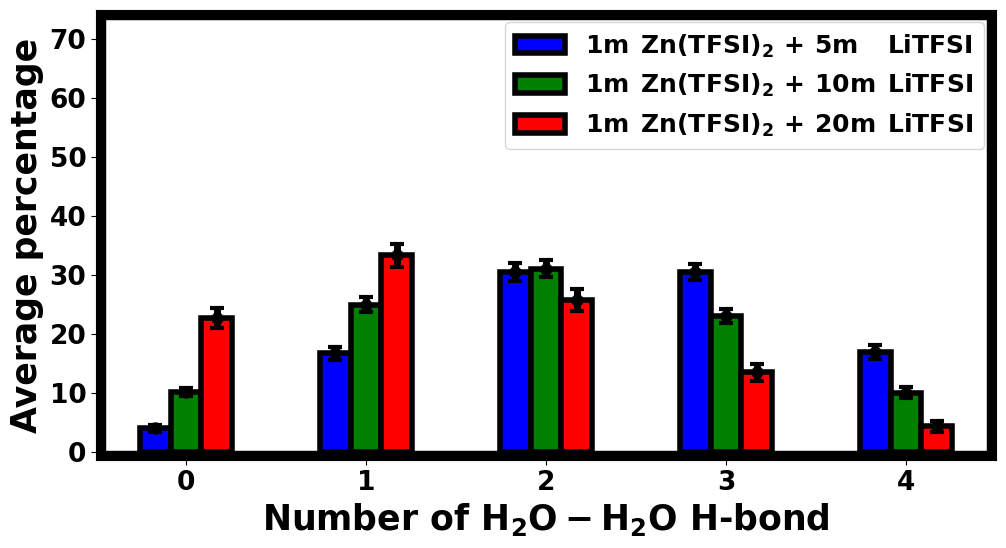

In [143]:
data2 = np.loadtxt('../../Mixed5mResults/Water/HBpercent.txt', dtype = 'float')
Avg2 = np.mean(data2,axis=0)
err2 = np.std(data2,axis=0)

data3 = np.loadtxt('../../Mixed10mResults/Water/HBpercent.txt', dtype = 'float')
Avg3 = np.mean(data3,axis=0)
err3 = np.std(data3,axis=0)

data4 = np.loadtxt('../../Mixed20mResults/Water/HBpercent.txt', dtype = 'float')
Avg4 = np.mean(data4,axis=0)
err4 = np.std(data4,axis=0)

fig = plt.figure(figsize=(10,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(5)
width = 0.17
plt.xticks(ind, weight = 'bold',size=19)
plt.yticks(weight = 'bold',size=19)



b2 = plt.bar(ind - width, Avg2, 
        width ,
        yerr = err2,
        capsize=3,
        color = 'blue',
        label = label2,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b3 = plt.bar(ind, Avg3, 
        width ,
        yerr = err3,
        capsize=3,
        color = 'green',
        label = label3,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b4 = plt.bar(ind + width, Avg4,  
        width ,
        yerr = err4,
        capsize=3,
        color='red',
        #lw = 3,
        label = label4,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )




plt.plot(ind - width, Avg2, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind , Avg3, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind + width, Avg4, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)


# plt.tight_layout()

plt.xlabel('Number of $\mathbf{H_2O-H_2O}$ H-bond', weight = 'bold',size=25)
plt.ylabel('Average percentage', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(-1.3,75)
plt.xlim(-0.5,4.5)

plt.axhline(y=-1.3,linewidth=14, color='k') 
plt.axvline(x=-0.5,linewidth=14, color='k')  

plt.axhline(y=75,linewidth=14, color='k') 
plt.axvline(x=4.5,linewidth=14, color='k') 

plt.legend(loc="best",fontsize=18)

plt.savefig('MixedHBP.svg', bbox_inches='tight', format='svg', transparent=True)
# plt.savefig('MixedHBP.eps', bbox_inches='tight', format='eps')
# plt.savefig('HBpercent/MixedHBP.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# HB per water

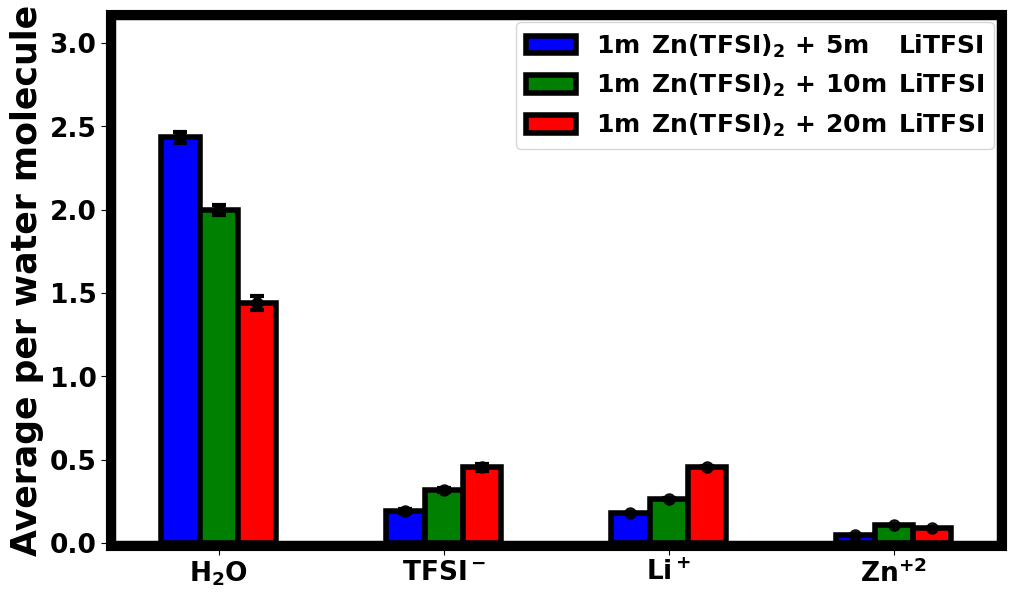

In [145]:
data5 = np.loadtxt('../../Mixed5mResults/Water/HBperWater.txt', dtype = 'float')

err5 = [np.std(data5[:,0]),np.std(data5[:,1]),np.std(data5[:,2]),np.std(data5[:,3])]
Avg5 = [np.mean(data5[:,0]),np.mean(data5[:,1]),np.mean(data5[:,2]),np.mean(data5[:,3])]

data6 = np.loadtxt('../../Mixed10mResults/Water/HBperWater.txt', dtype = 'float')

err6 = [np.std(data6[:,0]),np.std(data6[:,1]),np.std(data6[:,2]),np.std(data6[:,3])]
Avg6 = [np.mean(data6[:,0]),np.mean(data6[:,1]),np.mean(data6[:,2]),np.mean(data6[:,3])]

data7 = np.loadtxt('../../Mixed20mResults/Water/HBperWater.txt', dtype = 'float')

err7 = [np.std(data7[:,0]),np.std(data7[:,1]),np.std(data7[:,2]),np.std(data7[:,3])]
Avg7 = [np.mean(data7[:,0]),np.mean(data7[:,1]),np.mean(data7[:,2]),np.mean(data7[:,3])]

fig = plt.figure(figsize=(10,6),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(4)
width = 0.17
plt.xticks(ind, ['$\mathbf{H_2O}$','$\mathbf{TFSI^-}$','$\mathbf{Li^+}$','$\mathbf{Zn^{+2}}$'],weight = 'bold', size = 19)
plt.yticks(weight = 'bold', size = 19)

b1 = plt.bar(ind - width, Avg5, 
         
        width ,
        yerr = err5,
        capsize=3,
        label = label2,
        edgecolor = 'black',
        color = 'blue',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b2 = plt.bar(ind  , Avg6, 
        
        width ,
        yerr = err6,
        capsize=3,     
        label = label3,
        edgecolor = 'black',
        color = 'green',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b3 = plt.bar(ind + width , Avg7, 
         
        width ,
        yerr = err7,
        capsize=3,
        label = label4,
        edgecolor = 'black',
        color = 'red',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )


"""
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2lf' % float(height),
                ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
"""


plt.plot(ind - width, Avg5, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind , Avg6, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind + width, Avg7, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)




plt.ylim(-0.04,3.2)
plt.xlim(-0.5,3.5)

plt.axhline(y=3.2,linewidth=14, color='k') 
plt.axvline(x=-0.5,linewidth=14, color='k')  

plt.axhline(y=-0.04,linewidth=14, color='k') 
plt.axvline(x=3.5,linewidth=14, color='k') 

# plt.tight_layout()

#plt.xlabel('Species')
plt.ylabel('Average per water molecule',weight = 'bold', size = 25)
# plt.title('Type of Bonds per Water molecule',weight = 'bold', size = 15)

plt.legend(loc="best", fontsize=18)

plt.savefig('MixedHBPW.svg', bbox_inches='tight', format='svg', transparent=True)

# H2O Cluster Percent

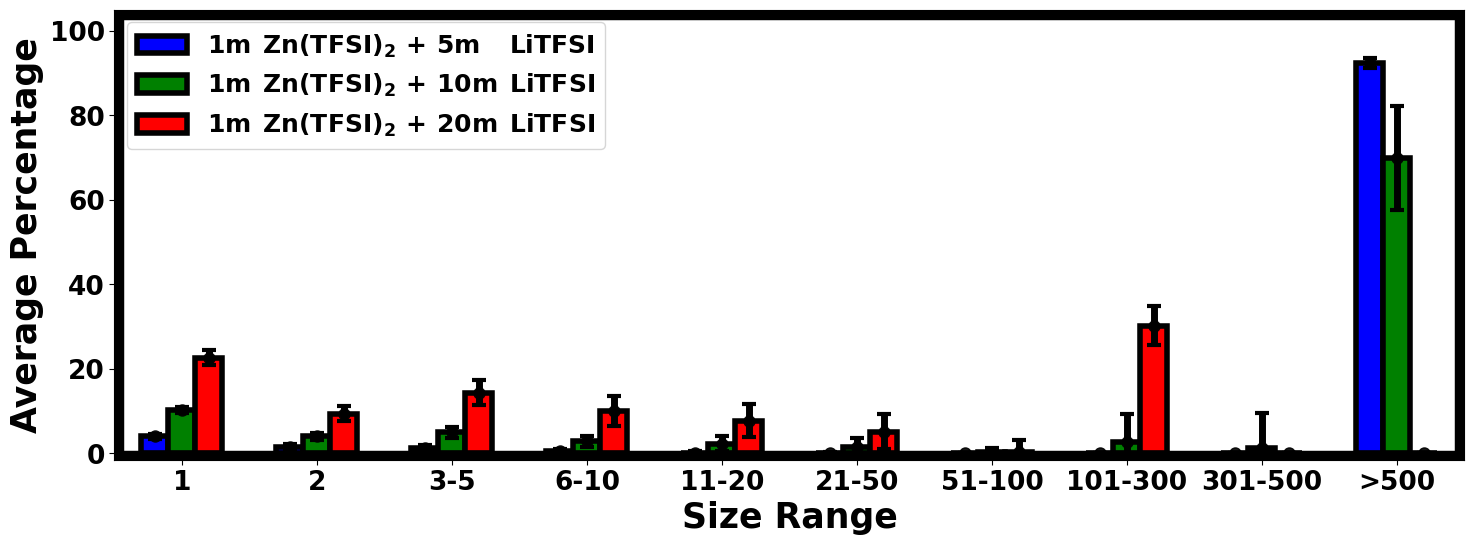

In [146]:
data10 = np.loadtxt('../../Mixed5mResults/Water/ClusterPercent.txt', dtype = 'float')
err10 = np.std(data10, axis = 0)
Avg10 = np.mean(data10, axis = 0)

data11 = np.loadtxt('../../Mixed10mResults/Water/ClusterPercent.txt', dtype = 'float')
err11 = np.std(data11, axis = 0)
Avg11 = np.mean(data11, axis = 0)

data12 = np.loadtxt('../../Mixed20mResults/Water/ClusterPercent.txt', dtype = 'float')
err12 = np.std(data12, axis = 0)
Avg12 = np.mean(data12, axis = 0)

fig = plt.figure(figsize=(15,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(10)
width = 0.2
plt.xticks(ind, ['1','2','3-5','6-10','11-20','21-50','51-100','101-300','301-500','>500'],weight = 'bold', size = 19,rotation = 0)
plt.yticks(weight = 'bold', size = 19)




b2 = plt.bar(ind - width , Avg10, 
        
        width ,
        yerr = err10,
        capsize=3,     
        label = label2,
        edgecolor = 'black',
        color = 'blue',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b3 = plt.bar(ind  , Avg11, 
         
        width ,
        yerr = err11,
        capsize=3,
        label = label3,
        edgecolor = 'black',
        color = 'green',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b4 = plt.bar(ind + width , Avg12, 
         
        width,
        yerr = err12,
        capsize=3,
        label = label4,
        edgecolor = 'black',
        color = 'red',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

plt.plot(ind - width, Avg10, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind , Avg11, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind + width, Avg12, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)


plt.ylim(-1.5,105)
plt.xlim(-0.5,9.5)

plt.axhline(y=105,linewidth=14, color='k') 
plt.axvline(x=-0.5,linewidth=14, color='k')  

plt.axhline(y=-1.5,linewidth=14, color='k') 
plt.axvline(x=9.5,linewidth=14, color='k') 

# plt.tight_layout()

plt.legend()

plt.xlabel('Size Range',weight = 'bold', size = 25)
plt.ylabel('Average Percentage',weight = 'bold', size = 25)
# plt.title('Average percentage of water in various clusters size range',weight = 'bold', size = 15)

plt.legend(loc='best',fontsize=18)
plt.savefig('MixedCP.svg',format ='svg' ,bbox_inches='tight', transparent=True)
# plt.savefig('ClusterH2O/MixedCP.eps',format ='eps' ,bbox_inches='tight')
# plt.savefig('ClusterH2O/MixedCP.jpg',format ='jpg' ,bbox_inches='tight')
# plt.clf()

# Largest Component

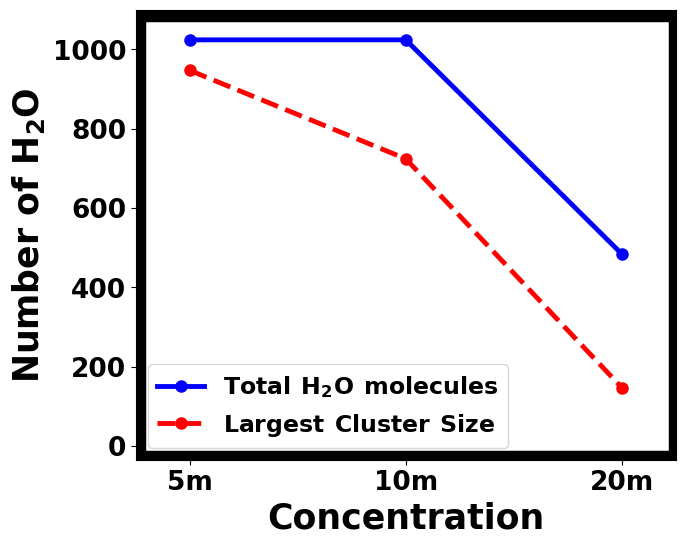

In [147]:
lar2 = np.mean(np.loadtxt('../../Mixed5mResults/Water/Largest.txt'))
lar3 = np.mean(np.loadtxt('../../Mixed10mResults/Water/Largest.txt'))
lar4 = np.mean(np.loadtxt('../../Mixed20mResults/Water/Largest.txt'))

fig = plt.figure(figsize=(6,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

y1 = [lar2,lar3,lar4]
x = ['5m', '10m', '20m']

y2 = [numW2,numW3,numW4]

plt.plot(x,y2,'bo-', label=r'$\mathbf{Total \hspace{0.45} H_2O \hspace{0.45} molecules}$', markersize=8, linewidth = 3.5)
plt.plot(x,y1,'ro--', label=r'$\mathbf{Largest \hspace{0.45} Cluster \hspace{0.45} Size}$', markersize=8, linewidth = 3.5)


plt.xticks(weight = 'bold', size = 19,rotation = 0)
plt.yticks(weight = 'bold', size = 19)

plt.ylim(-35,1100)
plt.xlim(-0.25,2.25)

plt.axhline(y=1095,linewidth=14, color='k') 
plt.axvline(x=-0.25,linewidth=14, color='k')  

plt.axhline(y=-35,linewidth=14, color='k') 
plt.axvline(x=2.26,linewidth=14, color='k') 

plt.xlabel('Concentration',weight = 'bold', size = 25)
plt.ylabel('Number of $\mathbf{H_2O}$',weight = 'bold', size = 25)

plt.legend(loc='best',fontsize=17)

plt.savefig('MixedCP.svg',format ='svg' ,bbox_inches='tight',  facecolor=(1,1,1,0))

# H2O Donor

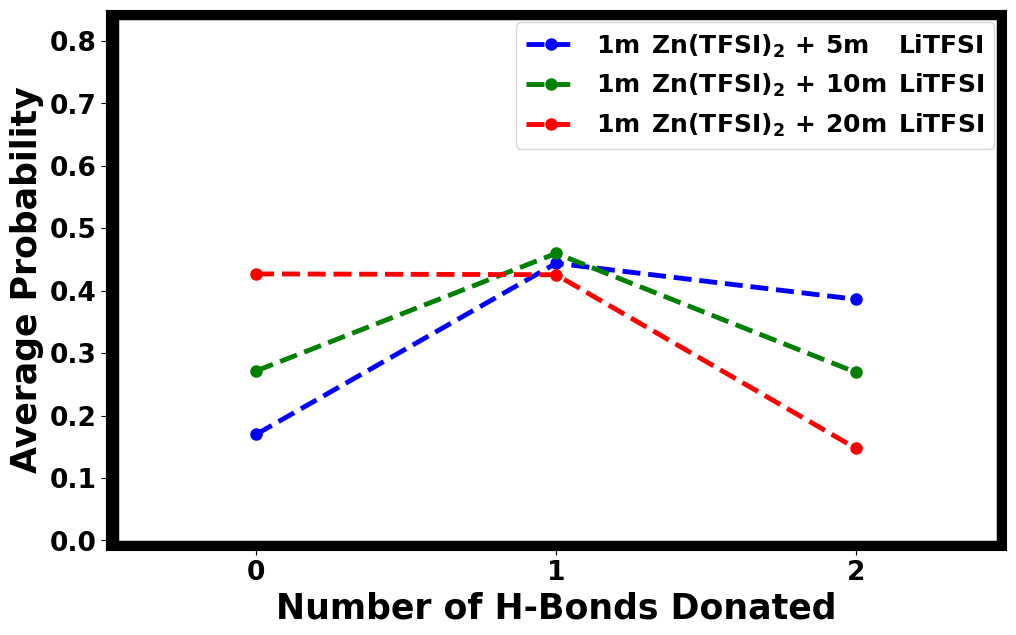

In [149]:

data18 = np.loadtxt('../../Mixed5mResults/Water/Donor.txt', dtype = 'float')
Avg18 = np.mean(data18,axis=0)
err18 = np.std(data18,axis=0)

data19 = np.loadtxt('../../Mixed10mResults/Water/Donor.txt', dtype = 'float')
Avg19 = np.mean(data19,axis=0)
err19 = np.std(data19,axis=0)

data20 = np.loadtxt('../../Mixed20mResults/Water/Donor.txt', dtype = 'float')
Avg20 = np.mean(data20,axis=0)
err20 = np.std(data20,axis=0)

fig = plt.figure(figsize=(10,6),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(3)
width = 0.17
plt.xticks(ind, weight = 'bold',size=19)
plt.yticks(weight = 'bold',size=19)


plt.plot(Avg18, 'bo--', markersize = 8, label=label2, linewidth = 3.5)
plt.plot(Avg19, 'go--', markersize = 8, label=label3, linewidth = 3.5)
plt.plot(Avg20, 'ro--', markersize = 8, label=label4, linewidth = 3.5)


# plt.tight_layout()

plt.xlabel('Number of H-Bonds Donated', weight = 'bold',size=25)
plt.ylabel('Average Probability', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(-0.015,0.85)
plt.xlim(-0.5,2.5)

plt.axhline(y=-0.015,linewidth=14, color='k') 
plt.axvline(x=-0.49,linewidth=14, color='k')  

plt.axhline(y=0.85,linewidth=14, color='k') 
plt.axvline(x=2.5,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mix_H2O_Donor.svg', bbox_inches='tight', format='svg')
# plt.savefig('H2O_Donor/H2O_Donor.eps', bbox_inches='tight', format='eps')
# plt.savefig('H2O_Donor/H2O_Donor.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# H2O Acceptor

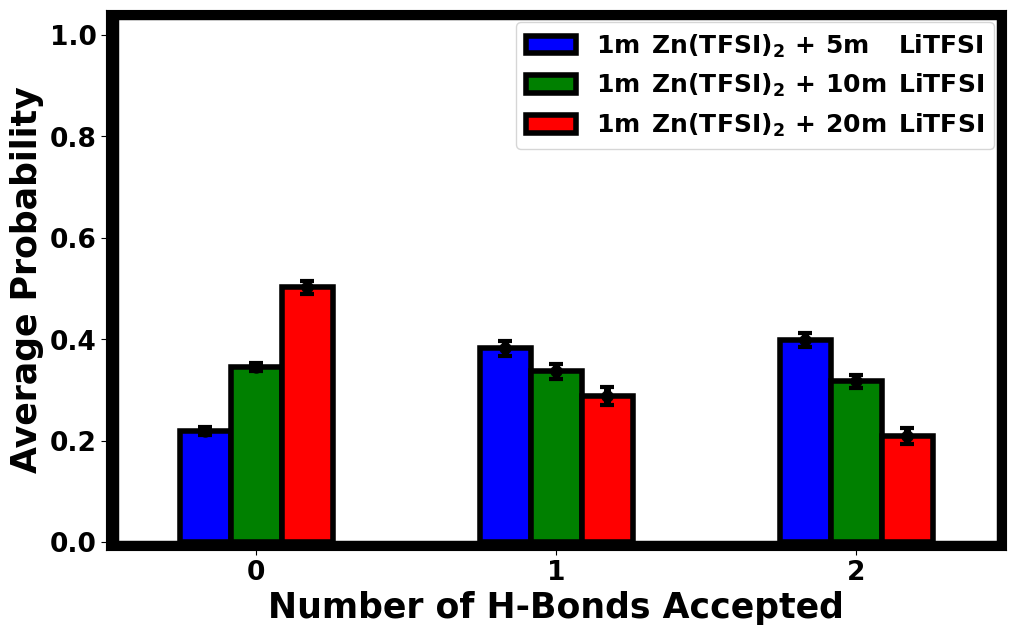

In [150]:


data18 = np.loadtxt('../../Mixed5mResults/Water/Acceptor.txt', dtype = 'float')
Avg18 = np.mean(data18,axis=0)
err18 = np.std(data18,axis=0)

data19 = np.loadtxt('../../Mixed10mResults/Water/Acceptor.txt', dtype = 'float')
Avg19 = np.mean(data19,axis=0)
err19 = np.std(data19,axis=0)

data20 = np.loadtxt('../../Mixed20mResults/Water/Acceptor.txt', dtype = 'float')
Avg20 = np.mean(data20,axis=0)
err20 = np.std(data20,axis=0)

fig = plt.figure(figsize=(10,6),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(3)
width = 0.17
plt.xticks(ind, weight = 'bold',size=19)
plt.yticks(weight = 'bold',size=19)



b2 = plt.bar(ind - width, Avg18, 
        width ,
        yerr = err18,
        capsize=3,
        color = 'blue',
        label = label2,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b3 = plt.bar(ind , Avg19, 
        width ,
        yerr = err19,
        capsize=3,
        color = 'green',
        label = label3,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b4 = plt.bar(ind + width, Avg20,  
        width ,
        yerr = err20,
        capsize=3,
        color='red',
        #lw = 3,
        label = label4,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

"""
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.5+height,
                '%.1lf' % float(height),
                ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
"""

plt.plot(ind - width, Avg18, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind , Avg19, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind + width, Avg20, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)


# plt.tight_layout()

plt.xlabel('Number of H-Bonds Accepted', weight = 'bold',size=25)
plt.ylabel('Average Probability', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(-0.015,1.05)
plt.xlim(-0.5,2.5)

plt.axhline(y=-0.015,linewidth=14, color='k') 
plt.axvline(x=-0.49,linewidth=14, color='k')  

plt.axhline(y=1.05,linewidth=14, color='k') 
plt.axvline(x=2.5,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mix_H2O_Acceptor.svg', bbox_inches='tight', format='svg', transparent=True)
# plt.savefig('H2O_Acceptor/H2O_Acceptor.eps', bbox_inches='tight', format='eps')
# plt.savefig('H2O_Acceptor/H2O_Acceptor.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# H2O Donor-Acceptor

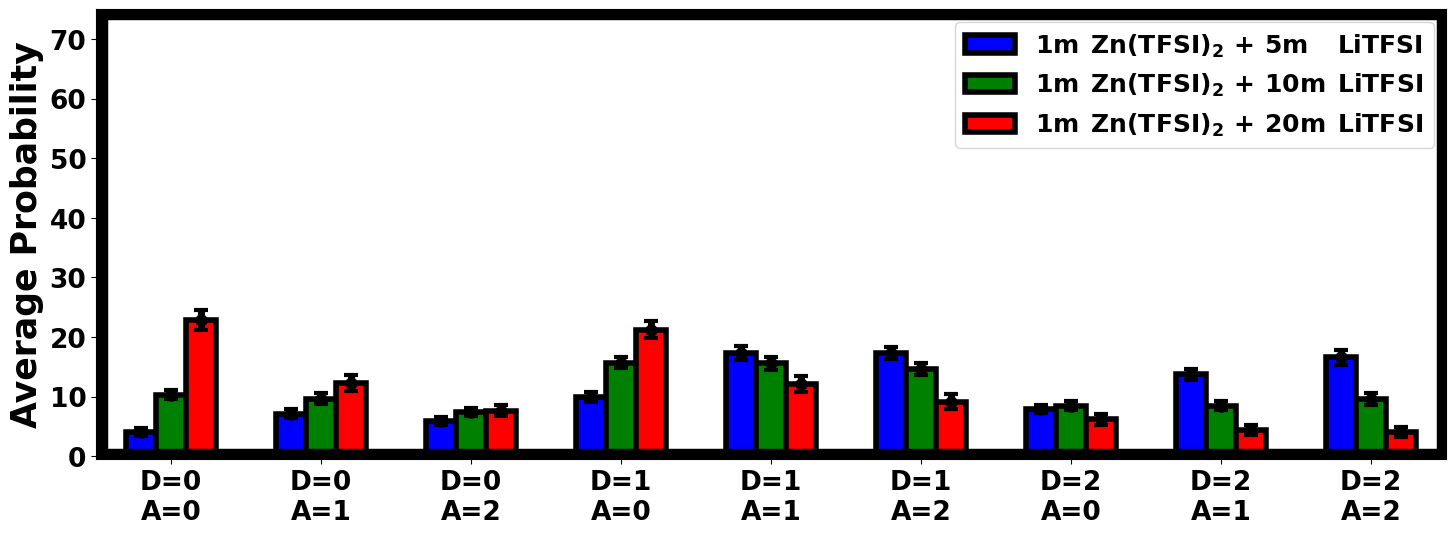

In [151]:


data18 = np.loadtxt('../../Mixed5mResults/Water/Donor_Acceptor.txt', dtype = 'float')
Avg18 = np.mean(data18,axis=0)
err18 = np.std(data18,axis=0)

data19 = np.loadtxt('../../Mixed10mResults/Water/Donor_Acceptor.txt', dtype = 'float')
Avg19 = np.mean(data19,axis=0)
err19 = np.std(data19,axis=0)

data20 = np.loadtxt('../../Mixed20mResults/Water/Donor_Acceptor.txt', dtype = 'float')
Avg20 = np.mean(data20,axis=0)
err20 = np.std(data20,axis=0)

fig = plt.figure(figsize=(15,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(9)
width = 0.2

# a1 = """ D=0
# A=0"""

plt.xticks(ind, ['D=0\nA=0','D=0\nA=1','D=0\nA=2','D=1\nA=0','D=1\nA=1','D=1\nA=2','D=2\nA=0','D=2\nA=1','D=2\nA=2'] ,weight = 'bold',size=19, rotation = 0)
plt.yticks(weight = 'bold',size=19)


b2 = plt.bar(ind - width, Avg18, 
        width ,
        yerr = err18,
        capsize=3,
        color = 'blue',
        label = label2,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b3 = plt.bar(ind , Avg19, 
        width ,
        yerr = err19,
        capsize=3,
        color = 'green',
        label = label3,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

b4 = plt.bar(ind + width, Avg20,  
        width ,
        yerr = err20,
        capsize=3,
        color='red',
        #lw = 3,
        label = label4,
        edgecolor = 'black',
        linewidth=4,
        error_kw=dict(lw=5, capsize=5, capthick=3)
       )

"""
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.5+height,
                '%.1lf' % float(height),
                ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
"""


plt.plot(ind - width, Avg18, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind , Avg19, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)
plt.plot(ind + width, Avg20, marker = 'o',linestyle="", color = 'k', alpha = 0.9, markersize = 8)


# plt.tight_layout()

# plt.xlabel('Number of H-Bonds Accepted', weight = 'bold',size=14)
plt.ylabel('Average Probability', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(-0.5,75)
plt.xlim(-0.5,8.5)

plt.axhline(y=-0.3,linewidth=14, color='k') 
plt.axvline(x=-0.49,linewidth=14, color='k')  

plt.axhline(y=74.8,linewidth=14, color='k') 
plt.axvline(x=8.5,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mix_H2O_DA.svg', bbox_inches='tight', format='svg', transparent=True)
# plt.savefig('H2O_DA/H2O_DA.eps', bbox_inches='tight', format='eps')
# plt.savefig('H2O_DA/H2O_DA.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# H-Bond Lifetimes

In [152]:
Avg18 = np.array([])
err18 = np.array([])

Avg19 = np.array([])
err19 = np.array([])

Avg20 = np.array([])
err20 = np.array([])




data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesW.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))

data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesO.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))

data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesF.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))

data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesN.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))



data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesW.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))

data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesO.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))

data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesF.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))

data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesN.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))



data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesW.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesO.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesF.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesN.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

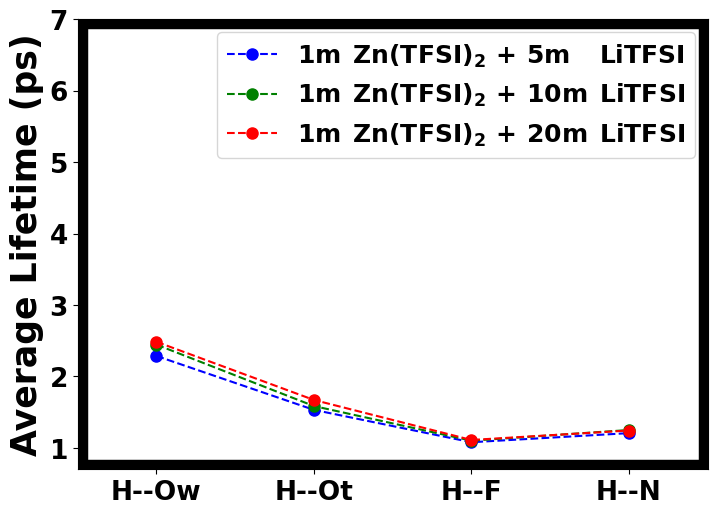

In [155]:
fig = plt.figure(figsize=(7,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(4)
width = 0.2

# a1 = """ D=0
# A=0"""

plt.xticks(ind , ['H--Ow','H--Ot','H--F','H--N'] ,weight = 'bold',size=19, rotation = 0)
plt.yticks(weight = 'bold',size=19)



plt.plot(Avg18, 'bo--', markersize = 8, label=label2)
plt.plot(Avg19, 'go--', markersize = 8, label=label3)
plt.plot(Avg20, 'ro--', markersize = 8, label=label4)



# plt.tight_layout()

# plt.xlabel('Number of H-Bonds Accepted', weight = 'bold',size=14)
plt.ylabel('Average Lifetime (ps)', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(0.7,7)
plt.xlim(-0.5,3.5)

plt.axhline(y=7,linewidth=14, color='k') 
plt.axvline(x=-0.5,linewidth=14, color='k')  

plt.axhline(y=0.7,linewidth=14, color='k') 
plt.axvline(x=3.5,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mixedfetimes.svg', bbox_inches='tight', format='svg', facecolor=(1,1,1,0))
# plt.savefig('Mixedfetimes/Mixedfetimes.eps', bbox_inches='tight', format='eps')
# plt.savefig('Mixedfetimes/Mixedfetimes.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# Donor Lifetimes

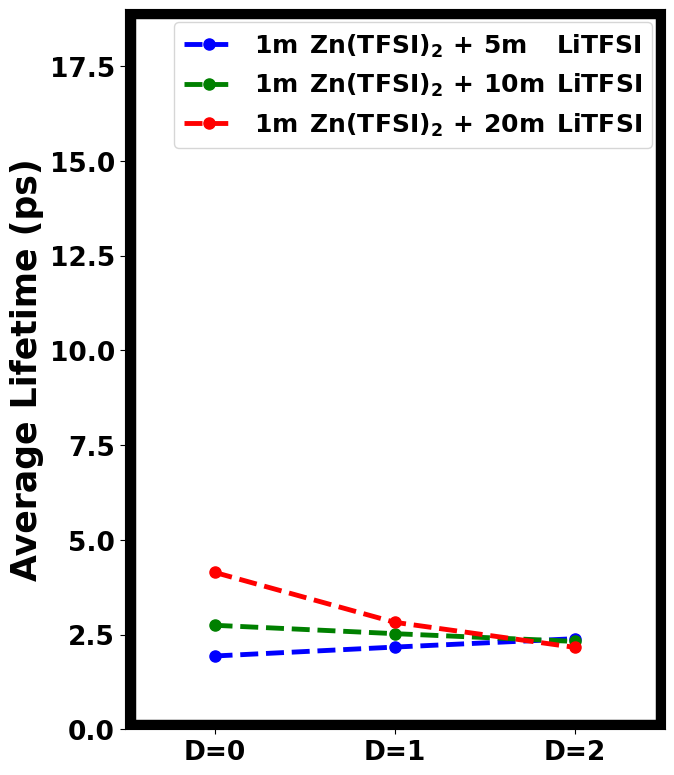

In [162]:
Avg18 = np.array([])
err18 = np.array([])

Avg19 = np.array([])
err19 = np.array([])

Avg20 = np.array([])
err20 = np.array([])






data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesD0.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))

data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesD1.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))

data18 = np.loadtxt('../../Mixed5mResults/RT/RtimesD2.txt', dtype = 'float')
Avg18 = np.append(Avg18,np.mean(data18))
err18 = np.append(err18,np.std(data18))




data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesD0.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))

data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesD1.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))

data19 = np.loadtxt('../../Mixed10mResults/RT/RtimesD2.txt', dtype = 'float')
Avg19 = np.append(Avg19,np.mean(data19))
err19 = np.append(err19,np.std(data19))




data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesD0.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesD1.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

data20 = np.loadtxt('../../Mixed20mResults/RT/RtimesD2.txt', dtype = 'float')
Avg20 = np.append(Avg20,np.mean(data20))
err20 = np.append(err20,np.std(data20))

fig = plt.figure(figsize=(6,8),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(3)
width = 0.2

# a1 = """ D=0
# A=0"""

plt.xticks(ind , ['D=0','D=1','D=2'] ,weight = 'bold',size=19, rotation = 0)
plt.yticks(weight = 'bold',size=19)



plt.plot(Avg18, 'bo--', markersize = 8, label=label2, linewidth = 3.5)
plt.plot(Avg19, 'go--', markersize = 8, label=label3, linewidth = 3.5)
plt.plot(Avg20, 'ro--', markersize = 8, label=label4, linewidth = 3.5)


# plt.tight_layout()

# plt.xlabel('Number of H-Bonds Accepted', weight = 'bold',size=14)
plt.ylabel('Average Lifetime (ps)', weight = 'bold',size=25)
# plt.title('Percentage of H-bonds frequency', weight = 'bold',size=15)

plt.ylim(0,19)
plt.xlim(-0.5,2.5)

plt.axhline(y=0,linewidth=14, color='k') 
plt.axvline(x=-0.49,linewidth=14, color='k')  

plt.axhline(y=19,linewidth=14, color='k') 
plt.axvline(x=2.5,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mixed_DL.svg', bbox_inches='tight', format='svg', facecolor=(1,1,1,0))
# plt.savefig('Donor_Mixedfetimes/DL.eps', bbox_inches='tight', format='eps')
# plt.savefig('Donor_Mixedfetimes/DL.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

# Exchange Events

In [65]:
len(aa4)

40

In [ ]:
d2= np.loadtxt("../../Mixed5mResults/Exchange/Exchanges.txt")
d3= np.loadtxt("../../Mixed10mResults/Exchange/Exchanges.txt")
d4= np.loadtxt("../../Mixed20mResults/Exchange/Exchanges.txt")


aa2 = np.zeros(40)
aa3 = np.zeros(40)
aa4 = np.zeros(40)



for i in range(len(aa2)):
    for j in range(len(d2)):
        if d2[j]==i: aa2[i]+=1
            
for i in range(len(aa3)):
    for j in range(len(d3)):
        if d3[j]==i: aa3[i]+=1
            
for i in range(len(aa4)):
    for j in range(len(d4)):
        if d4[j]==i: aa4[i]+=1
            
            


a2 = aa2[1:-1]
a2 = (a2*100)/a2.sum()

a3 = aa3[1:-1]
a3 = (a3*100)/a3.sum()

a4 = aa4[1:-1]
a4 = (a4*100)/a4.sum()


names = np.array(['' for i in range(0,38)], dtype=object)
names[0] = 'Ow-->Ow(same water)'
names[1] = 'Ow-->Ow(diff water)'
names[2] = 'Ow-->Ot'
names[3] = 'Ow-->F'
names[4] = 'Ow-->N'
names[5] = 'Ow-->No Bond'

names[6] = 'Ot-->Ot(same Ot)'
names[7] = 'Ot-->Ot(same TFSI)'
names[8] = 'Ot-->Ot(diff TFSI)'
names[9] = 'Ot-->Ow'
names[10] = 'Ot-->F(same TFSI)'
names[11] = 'Ot-->F(diff TFSI)'
names[12] = 'Ot-->N(same TFSI)'
names[13] = 'Ot-->N(diff TFSI)'
names[14] = 'Ot-->No Bond'

names[15] = 'F-->F(same F)'
names[16] = 'F-->F(same terminal)'
names[17] = 'F-->F(opposite terminal)'
names[18] = 'F-->F(diff TFSI)'
names[19] = 'F-->Ow'
names[20] = 'F-->Ot(same TFSI)'
names[21] = 'F-->Ot(diff TFSI)'
names[22] = 'F-->N(same TFSI)'
names[23] = 'F-->N(diff TFSI)'
names[24] = 'F-->No Bond'

names[25] = 'N-->N(same N)'
names[26] = 'N-->N(diff TFSI)'
names[27] = 'N-->Ow'
names[28] = 'N-->Ot(same TFSI)'
names[29] = 'N-->Ot(diff TFSI)'
names[30] = 'N-->F(same TFSI)'
names[31] = 'N-->F(diff TFSI)'
names[32] = 'N-->No Bond'


names[33] = 'No Bond-->No Bond'
names[34] = 'No Bond-->Ow'
names[35] = 'No Bond-->Ot'
names[36] = 'No Bond-->F'
names[37] = 'No Bond-->N'

fig = plt.figure(figsize=(10,4),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

mn = 0
mx = 8

p = np.flip(a3.argsort())
a2 =a2[p][mn:mx]
a3 =a3[p][mn:mx]
a4 =a4[p][mn:mx]
names = names[p][mn:mx]

s = len(a3)+1


# plt.tight_layout()
# ax.xaxis.tick_top()

plt.yticks(weight = 'bold')
plt.xticks(np.arange(1,s), 
           names, 
           rotation = 25,
           weight = 'bold'
          )

# plt.barh(np.arange(1,39),a39,edgecolor = 'black')

ax.plot(np.arange(1,s),a2, 'bx--', label = label2)
ax.plot(np.arange(1,s),a3, 'gv--', label = label3)
ax.plot(np.arange(1,s),a4, 'r^--', label = label4)

# ax.xaxis.set_label_position('top')
plt.ylabel("Percentage",weight = 'bold', size=13,color='k')
plt.xlabel("Bonding Exchanges",weight = 'bold', size=13,color='k')

plt.legend()

# plt.savefig('Exchanges2.jpg', bbox_inches='tight', format='jpg')
plt.savefig('Exchanges2.svg', bbox_inches='tight', format='svg')
# plt.savefig('Exchanges/Exchanges2.eps', bbox_inches='tight', format='eps')

# plt.clf()

In [ ]:
# bins = np.arange(1,40)
# plt.hist(d, bins,edgecolor = 'black', density = True)
# plt.xticks(bins[:-1]);

# H2O Graphs

## 5m

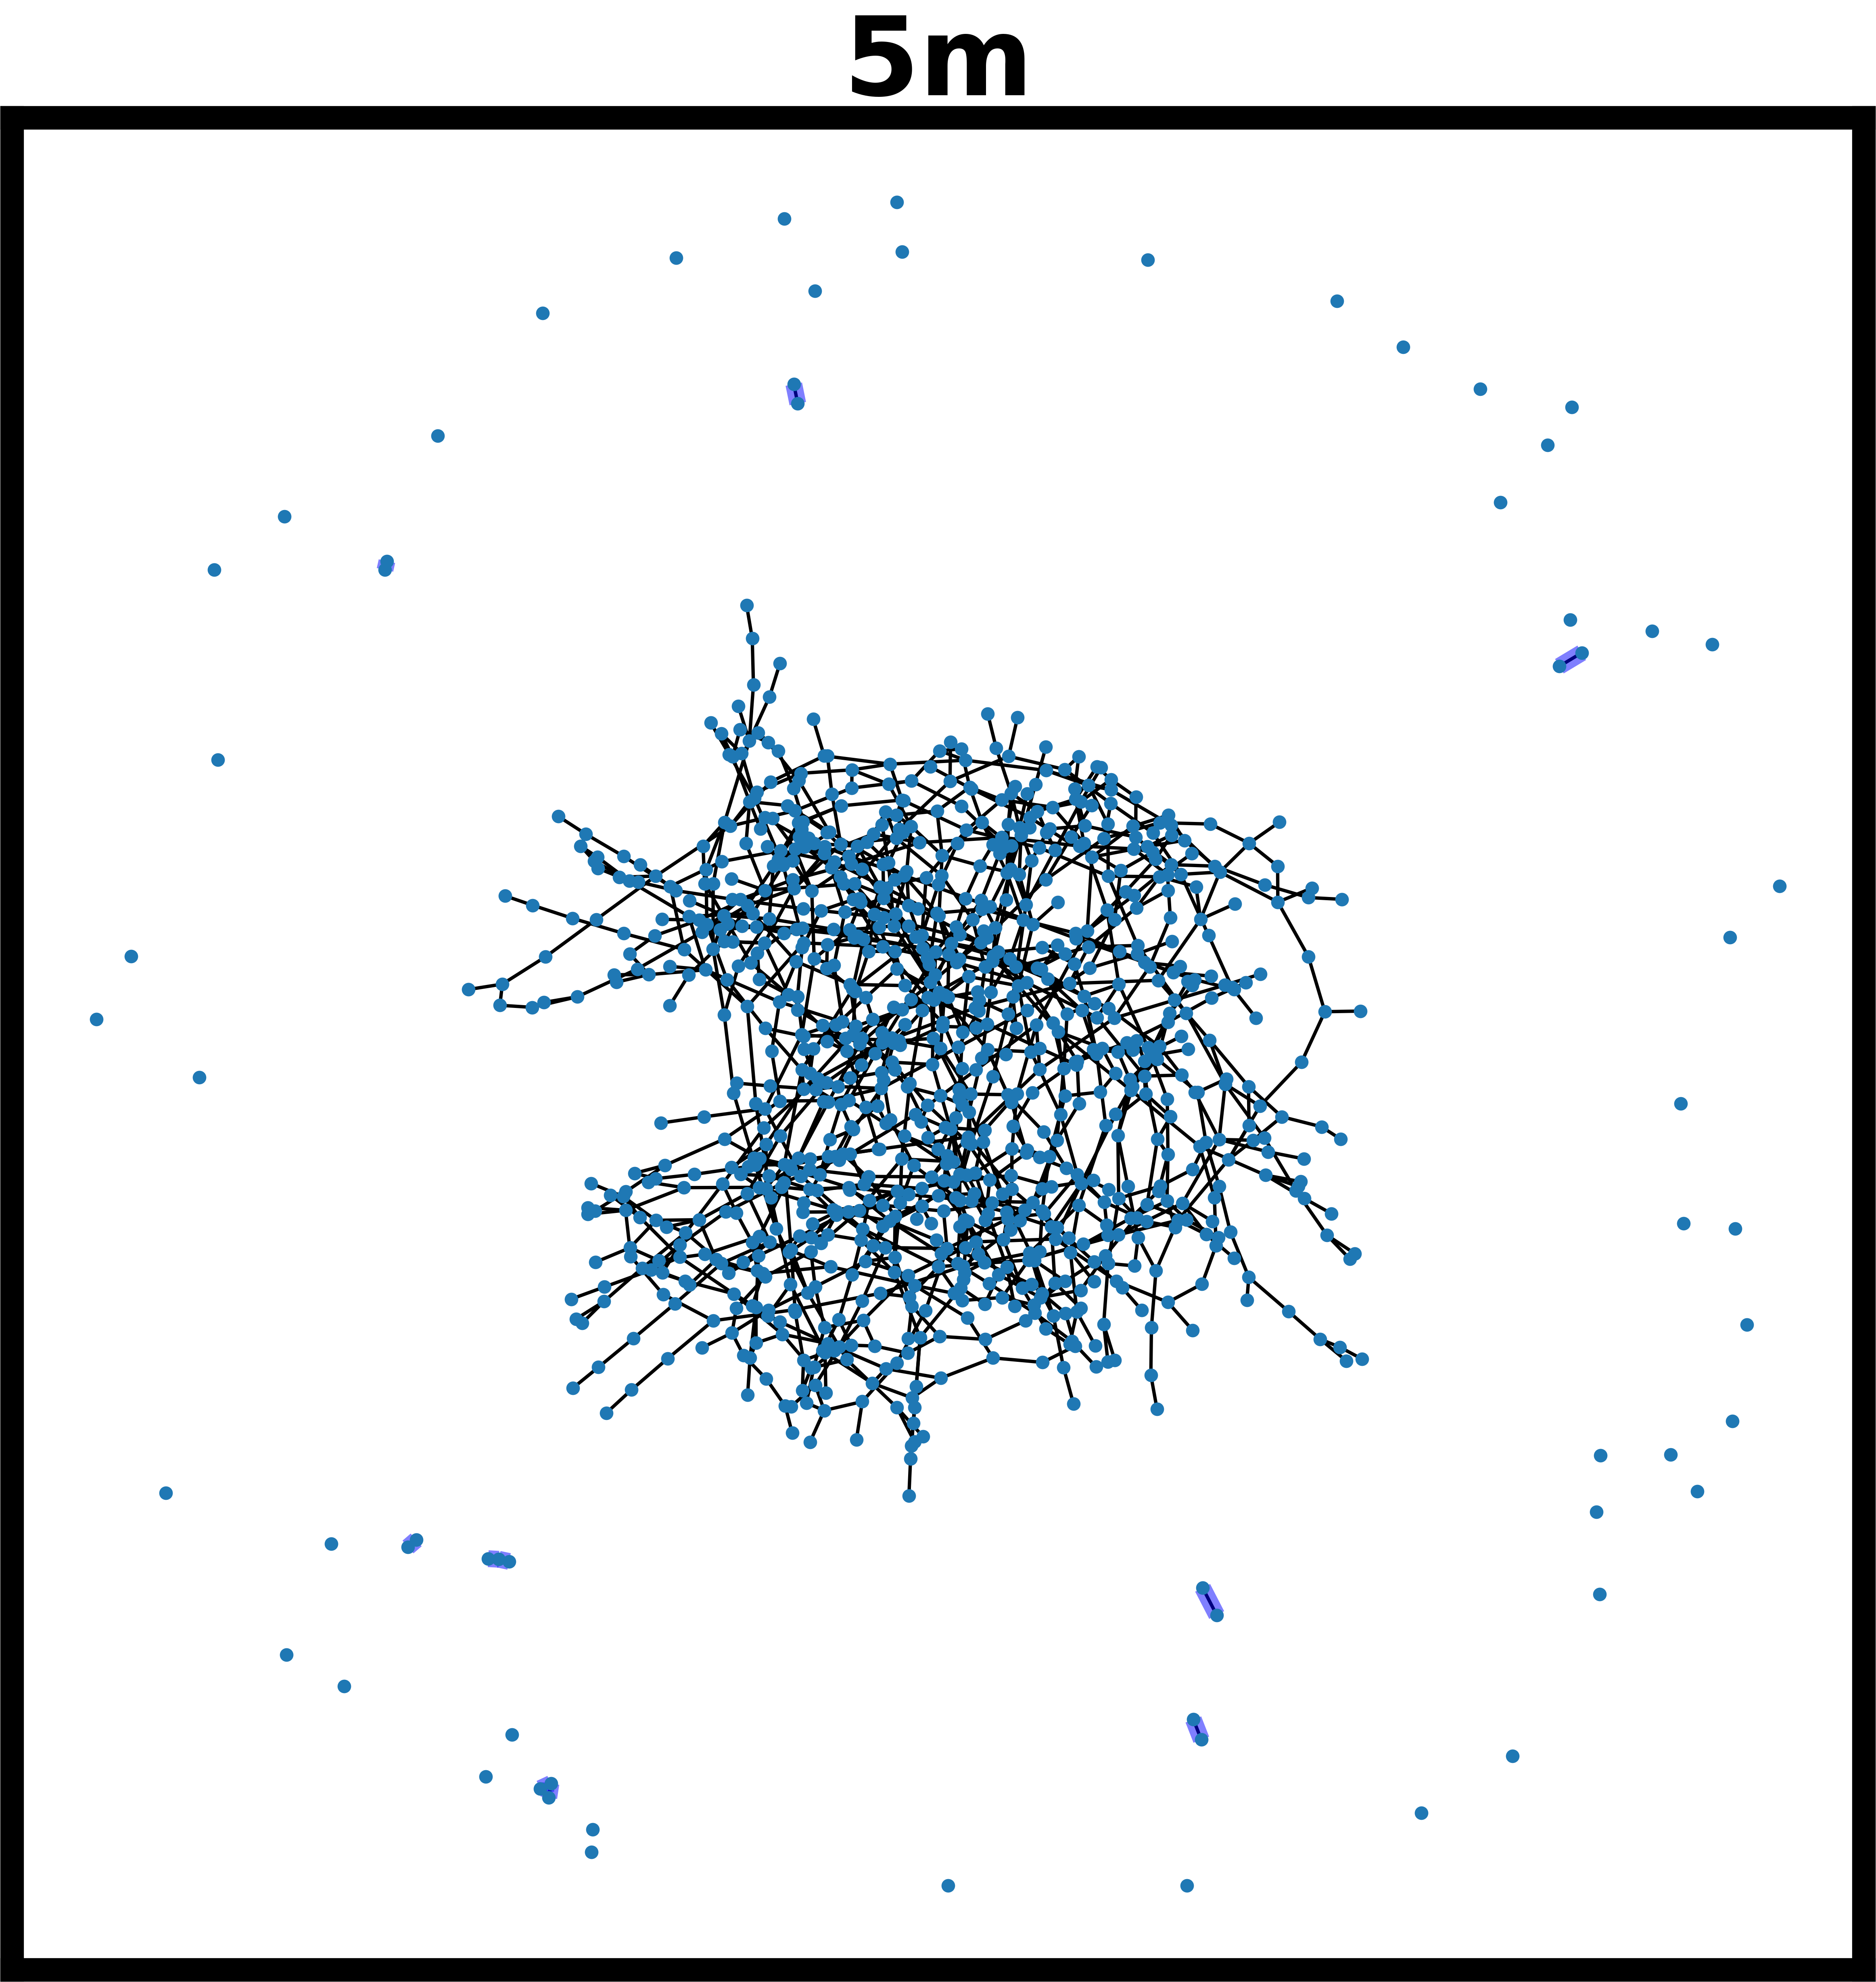

In [137]:
nodes = np.loadtxt('../../Mixed5mResults/SysInfo.txt')[1].astype(int)
nodes = [i for i in range(0,nodes)]
edges = np.genfromtxt(r'../../Mixed5mResults/Water/Edges.csv', delimiter=',',dtype=int)
G = nx.Graph()
G.add_nodes_from(nodes, nodetype = int)
G.add_edges_from(edges, edgetype = int)

fig = plt.figure(figsize=(17,17),dpi = 300)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

layout = nx.spring_layout
pos = layout(G)

nx.draw_networkx(G, pos, with_labels=False, node_size=50, width=2)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)

for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            G.subgraph(Gi), pos, edge_color="b", alpha=0.5, width=10.0,
        )
        
# plt.show()

plt.title("5m", size = 65, weight = 'bold')

ax.spines['right'].set(lw=14) 
ax.spines['left'].set(lw=14) 
ax.spines['top'].set(lw=14) 
ax.spines['bottom'].set(lw=14) 

plt.savefig('5m.svg', bbox_inches='tight', format='svg',pad_inches = 0.5)
# plt.savefig('Graphs_H2O/5m.eps', bbox_inches='tight', format='eps')
# plt.savefig('Graphs_H2O/5m.jpg', bbox_inches='tight', format='jpg')

# plt.clf()

## 10m

In [104]:
nodes = np.loadtxt('../../Mixed10mResults/SysInfo.txt')[1].astype(int)
nodes = [i for i in range(0,nodes)]
edges = np.genfromtxt(r'../../Mixed10mResults/Water/Edges.csv', delimiter=',',dtype=int)
G = nx.Graph()
G.add_nodes_from(nodes, nodetype = int)
G.add_edges_from(edges, edgetype = int)

layout = nx.spring_layout
pos = layout(G, 
             k=0.06,
             iterations=150
            )

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

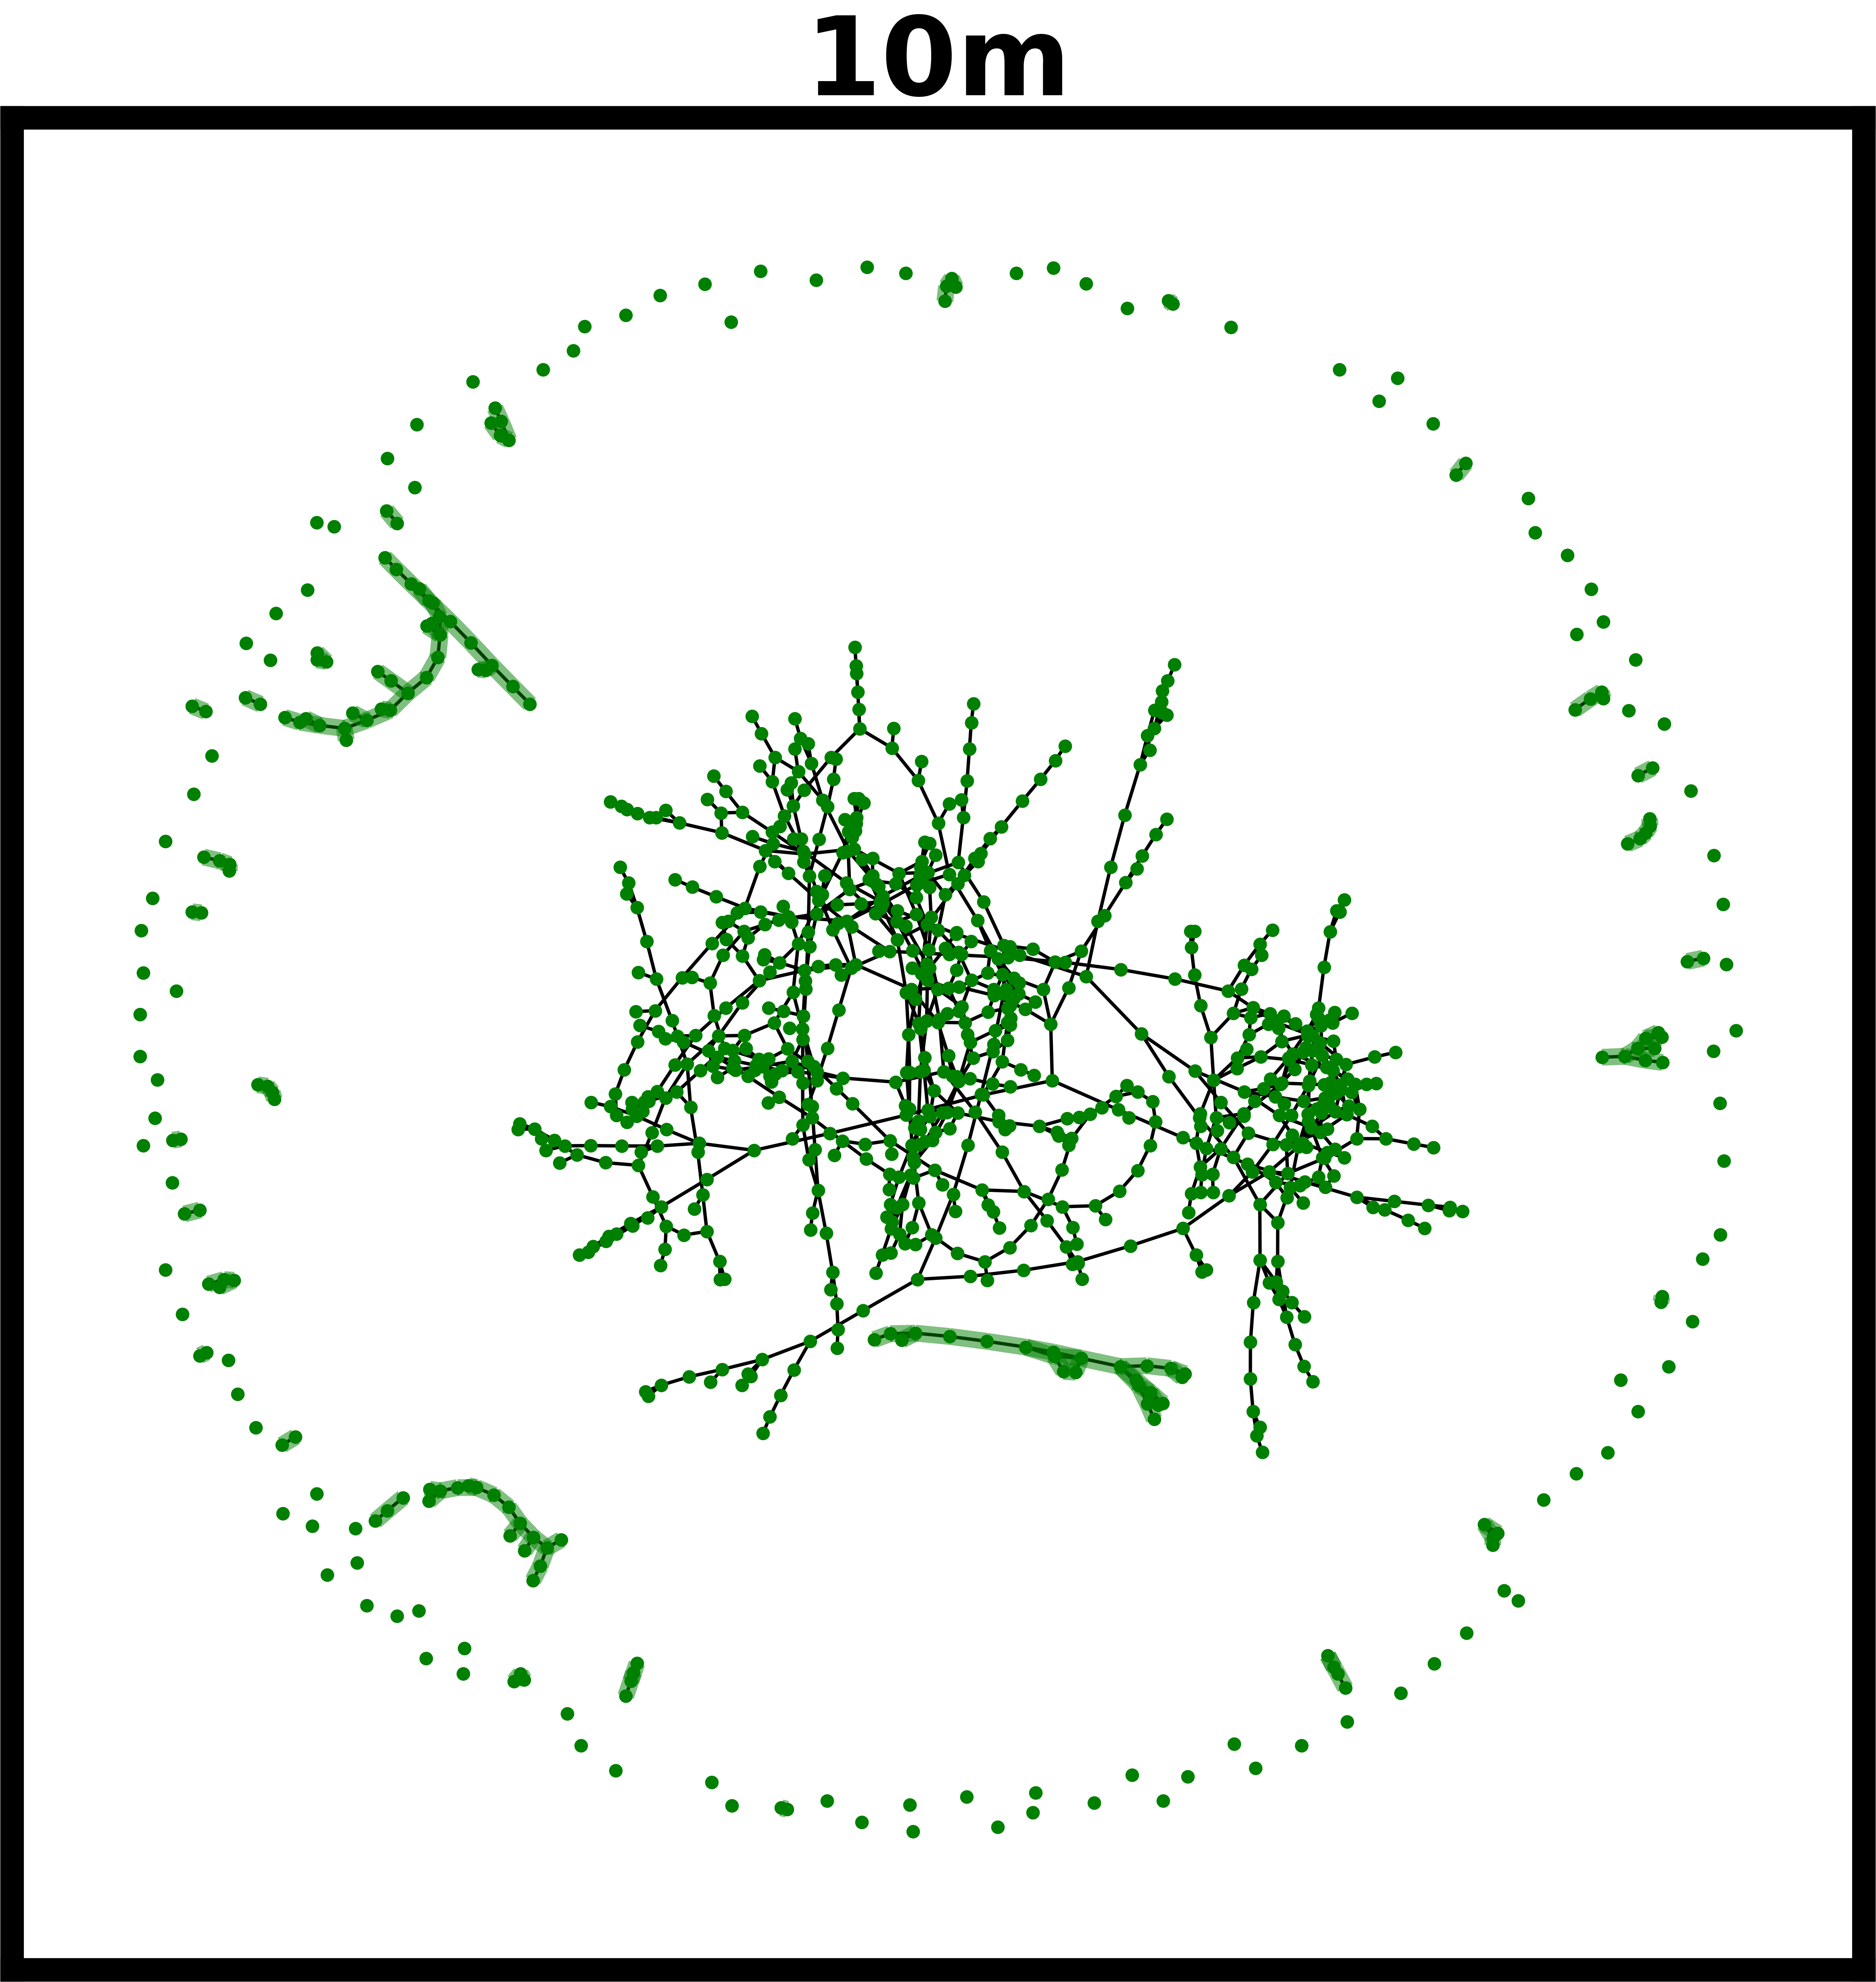

In [112]:
fig = plt.figure(figsize=(17,17),dpi = 300)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

nx.draw_networkx(G, pos, with_labels=False,  node_size=50, width=2, node_color="g")

for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            G.subgraph(Gi), pos, edge_color="g", alpha=0.5, width=10.0,
        )
        
plt.title("10m", size = 65, weight = 'bold')

ax.spines['right'].set(lw=14) 
ax.spines['left'].set(lw=14) 
ax.spines['top'].set(lw=14) 
ax.spines['bottom'].set(lw=14) 

plt.savefig('10m.svg', bbox_inches='tight', format='svg',pad_inches = 0.5)

In [108]:
print(pos)

{0: array([-0.42458302, -0.11958967]), 1: array([-0.21874818, -0.01798222]), 2: array([-0.16011859,  0.25327039]), 3: array([0.02148725, 0.31350946]), 4: array([-0.14869654, -0.20516671]), 5: array([-0.96943259,  0.19417796]), 6: array([ 0.02915845, -0.20274442]), 7: array([0.79935569, 0.43289781]), 8: array([0.48073229, 0.05467856]), 9: array([0.10193196, 0.09250958]), 10: array([ 0.48326433, -0.10279578]), 11: array([ 0.61699075, -0.19504108]), 12: array([0.8344788 , 0.44726443]), 13: array([ 0.90787554, -0.310756  ]), 14: array([ 0.46252558, -0.3992936 ]), 15: array([-0.24462581, -0.02376871]), 16: array([-0.3793256 ,  0.30639818]), 17: array([1.        , 0.02633129]), 18: array([-0.23275112,  0.18136543]), 19: array([ 0.01268927, -0.16894026]), 20: array([ 0.45069733, -0.0226923 ]), 21: array([ 0.95828366, -0.26314232]), 22: array([-0.10229646,  0.20537688]), 23: array([ 0.48025894, -0.1595244 ]), 24: array([-0.93209779, -0.33341703]), 25: array([ 0.28669918, -0.44604495]), 26: arr

## 20m

In [131]:
nodes = np.loadtxt('../../Mixed20mResults/SysInfo.txt')[1].astype(int)
nodes = [i for i in range(0,nodes)]
edges = np.genfromtxt(r'../../Mixed20mResults/Water/Edges.csv', delimiter=',',dtype=int)
G = nx.Graph()
G.add_nodes_from(nodes, nodetype = int)
G.add_edges_from(edges, edgetype = int)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

layout = nx.spring_layout
pos = layout(G, 
             k=0.08,
             iterations=150
            )

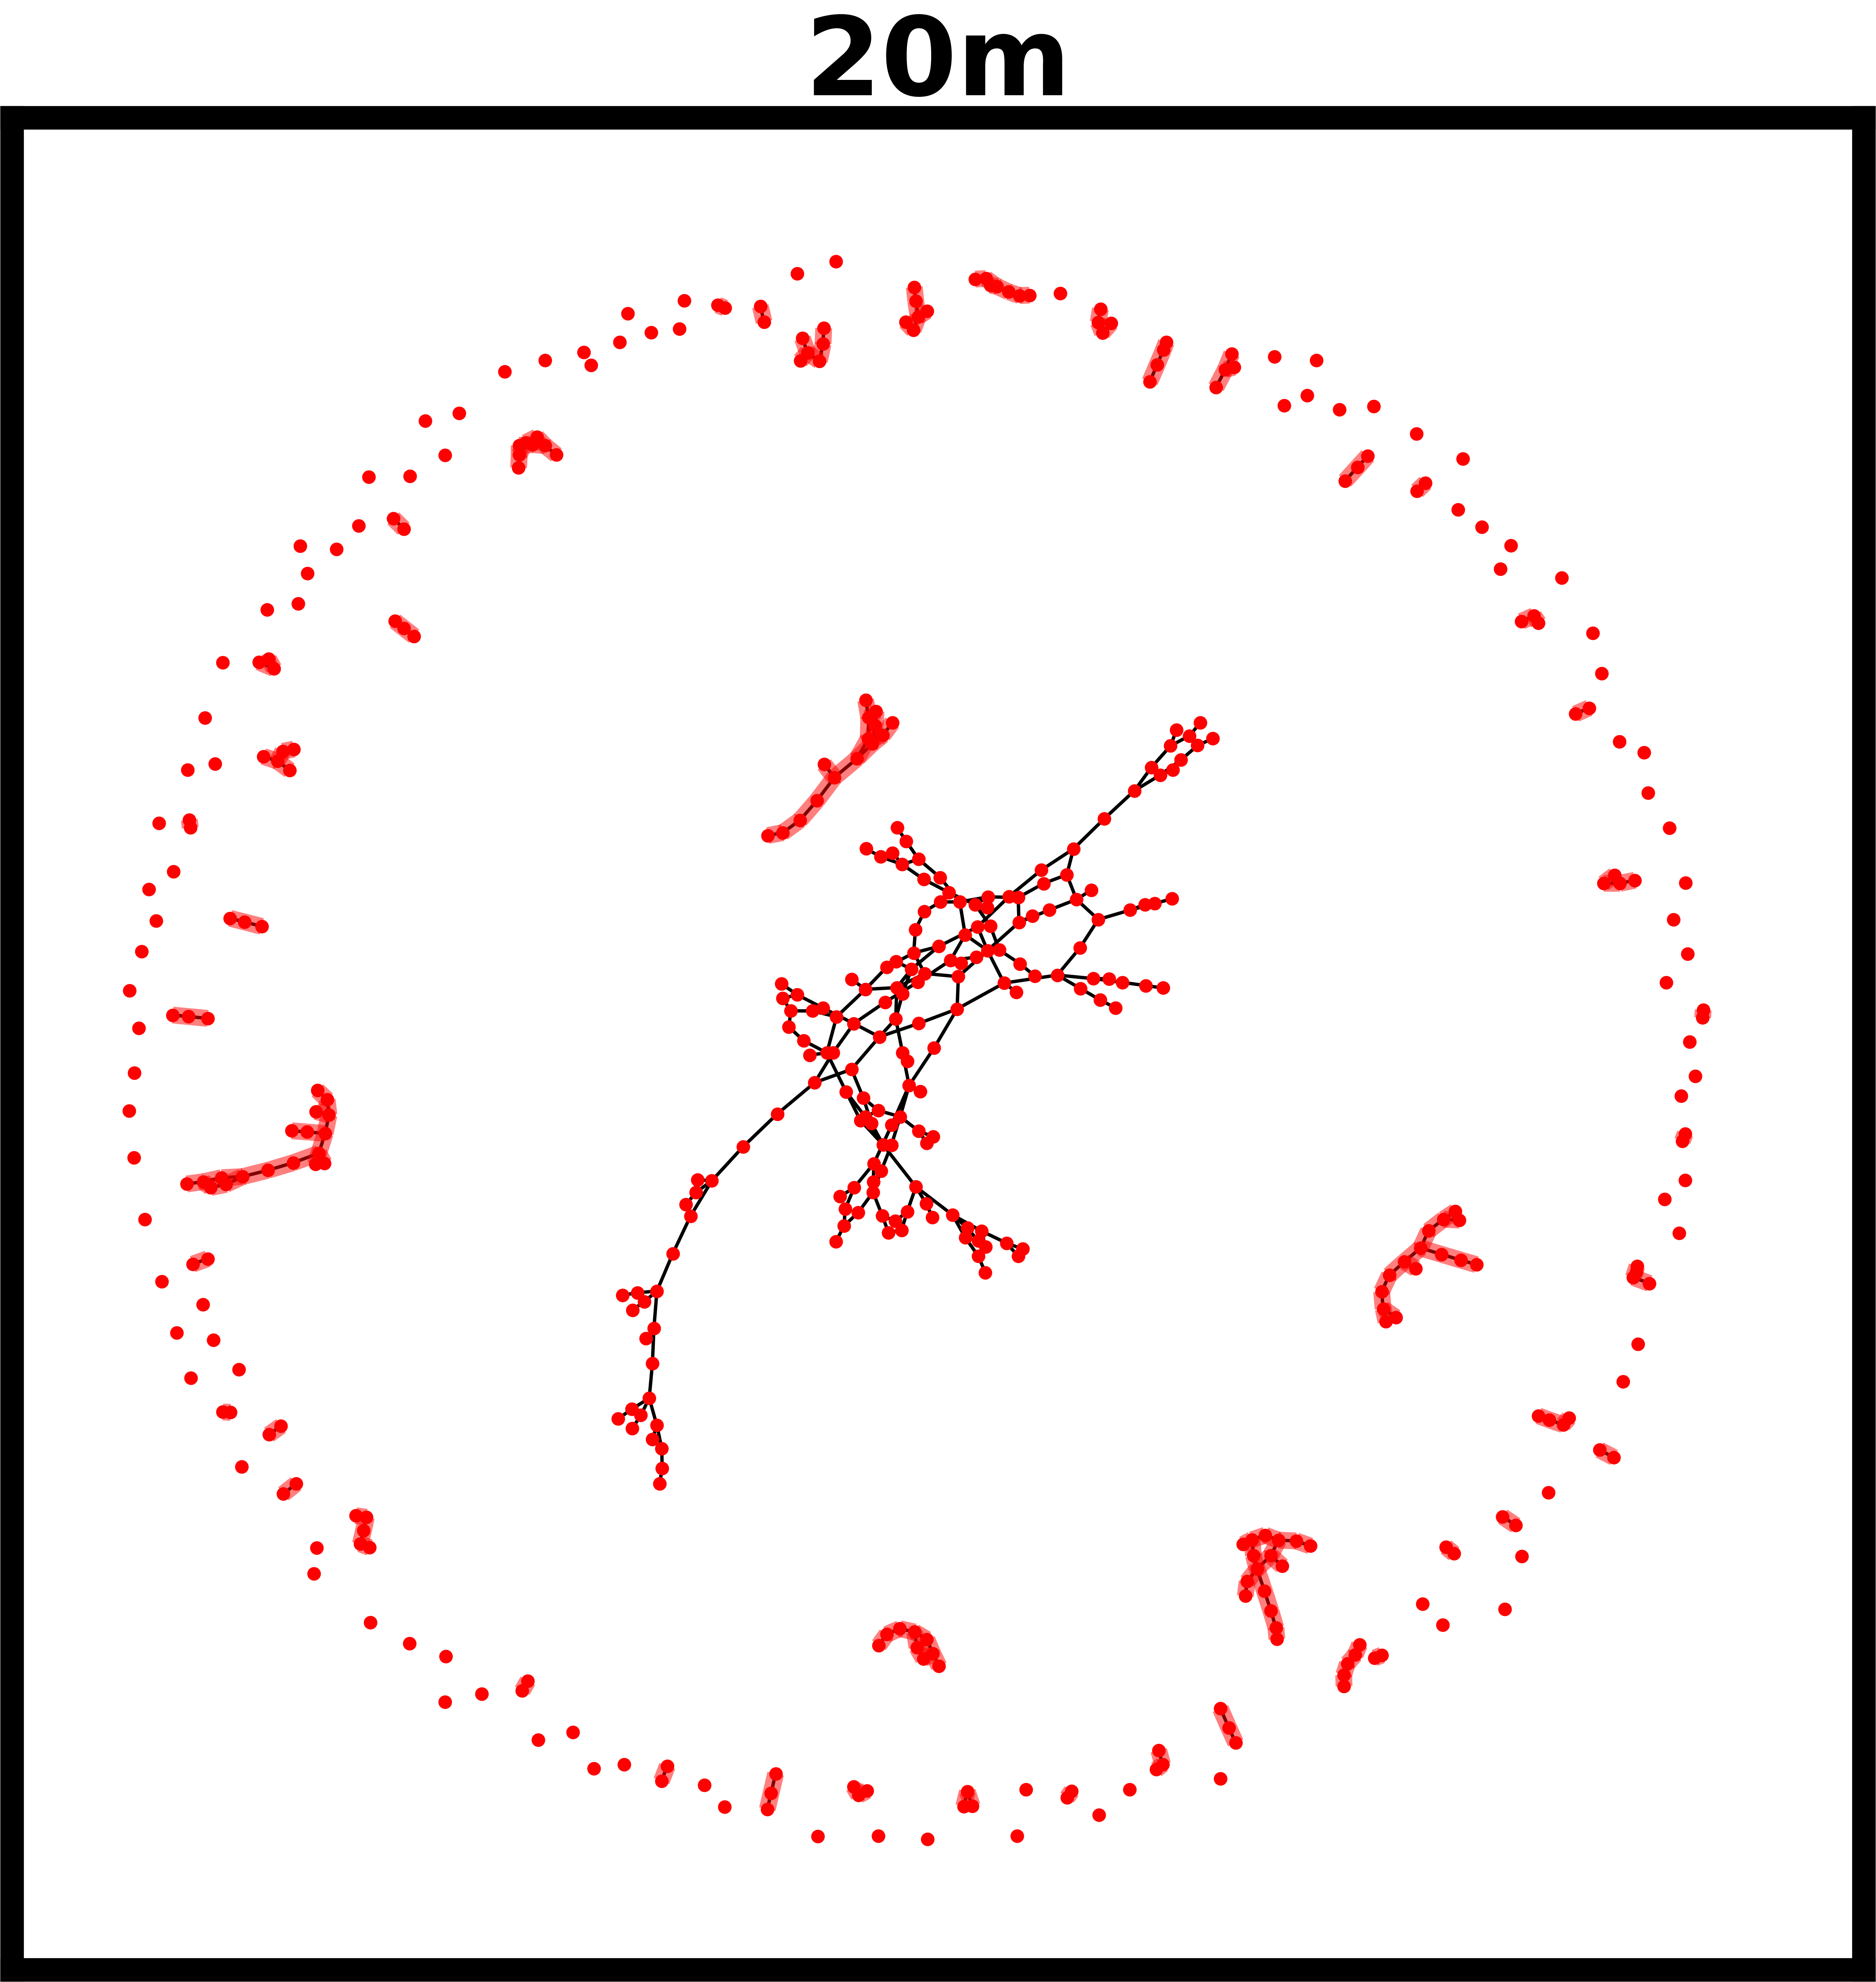

In [132]:
fig = plt.figure(figsize=(17,17),dpi = 300)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

nx.draw_networkx(G, pos, with_labels=False, node_size=50, width=2, node_color="r")

for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            G.subgraph(Gi), pos, edge_color="r", alpha=0.5, width=10.0,
        )
        
plt.title("20m", size = 65, weight = 'bold')

ax.spines['right'].set(lw=14) 
ax.spines['left'].set(lw=14) 
ax.spines['top'].set(lw=14) 
ax.spines['bottom'].set(lw=14) 

plt.savefig('20m.svg', bbox_inches='tight', format='svg',pad_inches = 0.5)

In [133]:
print(pos)

{0: array([-0.12055114, -0.01265711]), 1: array([-0.13638035,  0.06286242]), 2: array([-0.0042752 ,  0.06411867]), 3: array([ 0.05846283, -0.21315345]), 4: array([ 0.45771607, -0.70950808]), 5: array([-0.0241732 ,  0.09751945]), 6: array([0.24640574, 0.89276217]), 7: array([-0.33686025, -0.31066079]), 8: array([-0.0179426 , -0.10041015]), 9: array([0.7221782 , 0.64920374]), 10: array([0.24365878, 0.05631602]), 11: array([0.28113174, 0.16903861]), 12: array([-0.05087204,  0.06970147]), 13: array([0.54360064, 0.79633967]), 14: array([-0.04130751, -0.18459593]), 15: array([-0.02199414, -0.23520542]), 16: array([0.23480666, 0.08313655]), 17: array([0.25468648, 0.08288319]), 18: array([ 0.91629321, -0.28437183]), 19: array([0.20171375, 0.21337157]), 20: array([0.28647032, 0.31869328]), 21: array([0.74581595, 0.59671937]), 22: array([0.12876248, 0.94401151]), 23: array([0.55076934, 0.70712823]), 24: array([ 0.20781743, -0.93551399]), 25: array([-0.64106012,  0.53120845]), 26: array([-0.39145

# H2O Cycles

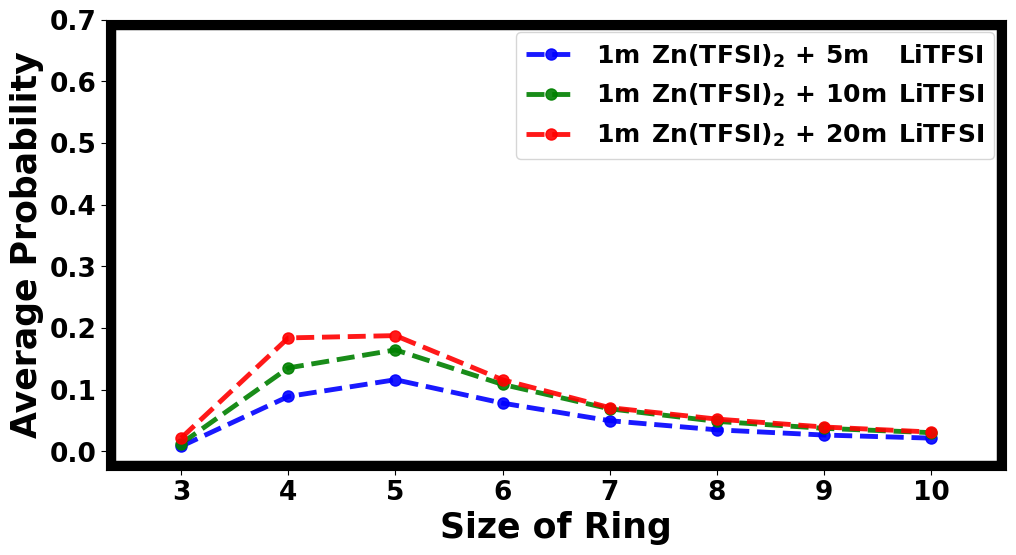

In [179]:



data2 = np.loadtxt('../../Mixed5mResults/Water/CyclesProbs.txt', dtype = 'float')
Avg2 = np.mean(data2,axis=0)
err2 = np.std(data2,axis=0)

data3 = np.loadtxt('../../Mixed10mResults/Water/CyclesProbs.txt', dtype = 'float')
Avg3 = np.mean(data3,axis=0)
err3 = np.std(data3,axis=0)

data4 = np.loadtxt('../../Mixed20mResults/Water/CyclesProbs.txt', dtype = 'float')
Avg4 = np.mean(data4,axis=0)
err4 = np.std(data4,axis=0)

fig = plt.figure(figsize=(10,5),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

ind = np.arange(3,11)
width = 0.17
plt.xticks(ind, weight = 'bold',size=19)
plt.yticks(weight = 'bold',size=19)





plt.plot(ind,Avg2, 'bo--', alpha = 0.9, markersize = 8,label=label2, linewidth = 3.5)
plt.plot(ind,Avg3, 'go--', alpha = 0.9, markersize = 8,label=label3, linewidth = 3.5)
plt.plot(ind,Avg4, 'ro--', alpha = 0.9, markersize = 8,label=label4, linewidth = 3.5)



# plt.tight_layout()

plt.xlabel('Size of Ring', weight = 'bold',size=25)
plt.ylabel('Average Probability', weight = 'bold',size=25)

plt.ylim(-0.03,0.7)
plt.xlim(2.3,10.7)

plt.axhline(y=-0.03,linewidth=14, color='k') 
plt.axvline(x=2.3,linewidth=14, color='k')  

plt.axhline(y=0.7,linewidth=14, color='k') 
plt.axvline(x=10.7,linewidth=14, color='k') 

plt.legend(fontsize=18)

plt.savefig('Mixed_Cycles_H2O.svg', bbox_inches='tight', format='svg')

# Orientation

In [172]:
def Plot2D(conc, spe):
    fig = plt.figure(figsize=(10,7), dpi = 300)
    o1 = np.loadtxt(f"../../Mixed{conc}mResults/Orientation/{spe}.txt")
    dis1,a1 = o1[:,0],o1[:,1]
    plt.xlabel('Distance', weight='bold', size=13)
    plt.ylabel('Angle', weight='bold', size=13)
    plt.hist2d(dis1,a1,cmap=plt.cm.jet, bins=(100,100), density=True)
    plt.colorbar()

In [175]:
species = widgets.Dropdown(options=["Ow","Ot","F","N","C"], description="Species:")
concentration = widgets.Dropdown(options=["5","10","20"], description="Conc:")

In [177]:
gui = widgets.interactive(Plot2D,conc=concentration, spe=species)
display.display(gui)

interactive(children=(Dropdown(description='Conc:', options=('5', '10', '20'), value='5'), Dropdown(descriptio…

# Overall Table

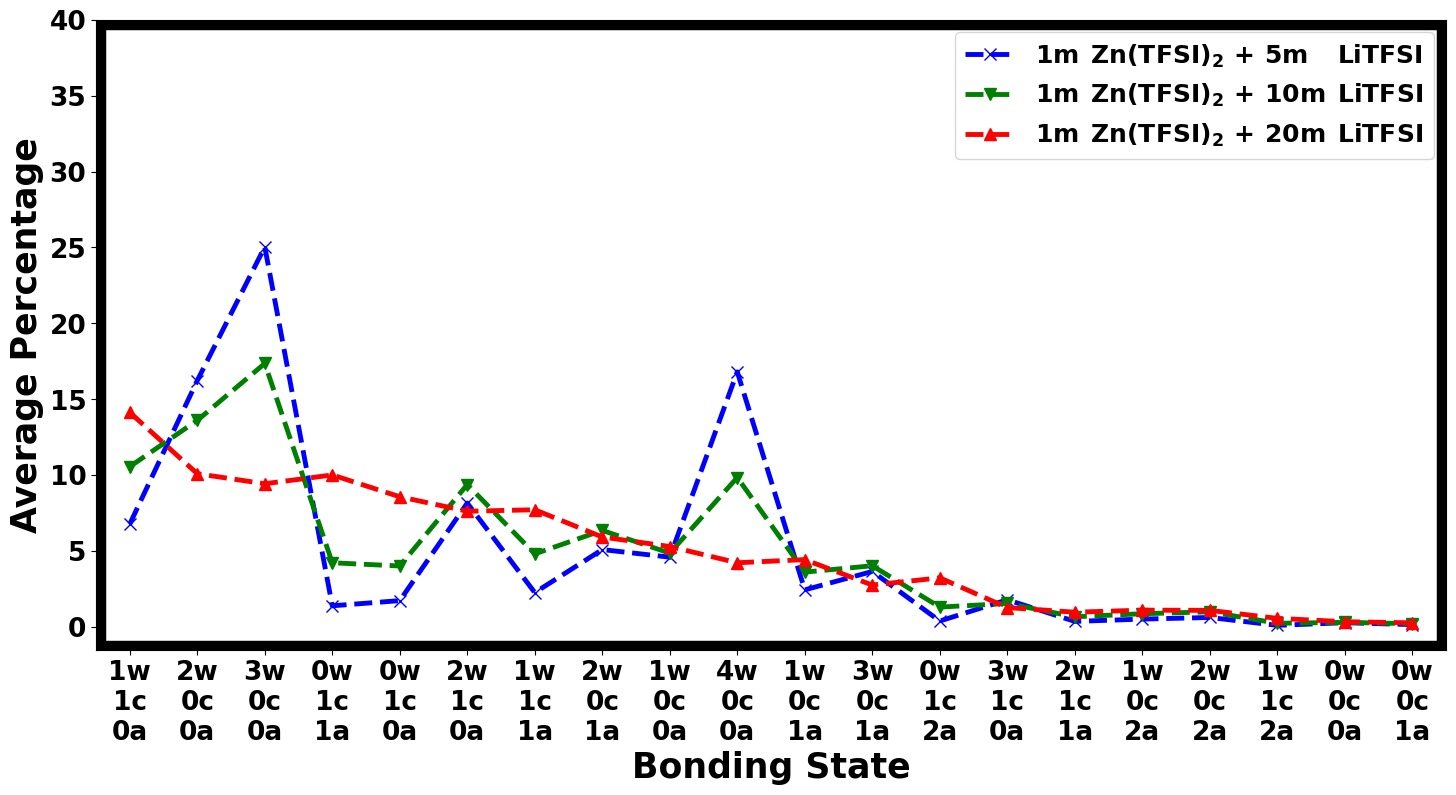

In [171]:

data2 = np.loadtxt("../../Mixed5mResults/Plots/DataFiles/HBabsValues.txt")
data2 = np.mean(data2,axis=0)
data3 = np.loadtxt("../../Mixed10mResults/Plots/DataFiles/HBabsValues.txt")
data3 = np.mean(data3,axis=0)
data4 = np.loadtxt("../../Mixed20mResults/Plots/DataFiles/HBabsValues.txt")
data4 = np.mean(data4,axis=0)


names= []
# HB=0,1,2,3,4 with other water
for i in range(0,5):   
    # Zn=0,1
    for j in range(0,2):
        # TFSI=0,1,2
        for k in range(0,3):
            names.append(f'{i}w\n{j}c\n{k}a')
            
names = np.array(names)

fig = plt.figure(figsize=(15,7),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

mx = 20

# p = np.flip(data4.argsort())

p = np.array([ 9, 12, 18,  4,  3, 15, 10, 13,  6, 24,  7, 19,  5, 21, 16,  8, 14,
       11,  0,  1, 25, 20,  2, 17, 27, 22, 26, 23, 28, 29])

data2 =data2[p][:mx]
data3 =data3[p][:mx]
data4 =data4[p][:mx]
names = names[p][:mx]

s = len(data2)+1


# plt.tight_layout()
# ax.xaxis.tick_top()

plt.yticks(weight = 'bold', size=19)
plt.xticks(np.arange(1,s), 
           names, 
           rotation = 0,
           weight = 'bold', 
           size=19
          )

# plt.barh(np.arange(1,39),a39,edgecolor = 'black')

ax.plot(np.arange(1,s),data2, 'bx--', label = label2, linewidth = 3.5, markersize=8)
ax.plot(np.arange(1,s),data3, 'gv--', label = label3, linewidth = 3.5, markersize=8)
ax.plot(np.arange(1,s),data4, 'r^--', label = label4, linewidth = 3.5, markersize=8)

# ax.xaxis.set_label_position('top')
plt.ylabel("Average Percentage",weight = 'bold', size=25,color='k')
plt.xlabel("Bonding State",weight = 'bold', size=25,color='k')


plt.legend(fontsize=18)

plt.ylim(-1.5,40)
plt.xlim(0.5,20.5)

plt.axhline(y=-1.5,linewidth=14, color='k') 
plt.axvline(x=0.5,linewidth=14, color='k')  

plt.axhline(y=40,linewidth=14, color='k') 
plt.axvline(x=20.5,linewidth=14, color='k') 

plt.savefig('Mixed_HBabsPercent.svg', bbox_inches='tight', format='svg')

# Iso Table

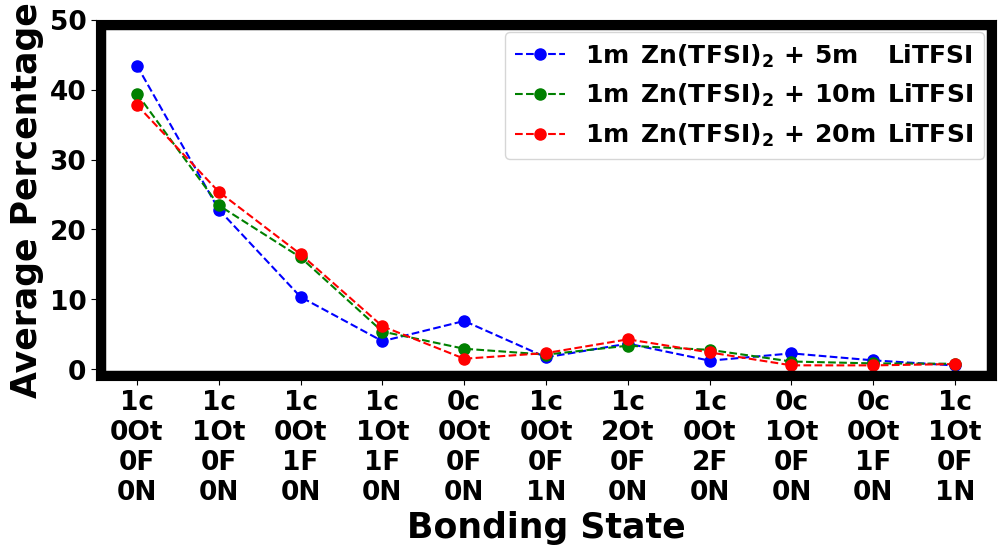

In [170]:

data2 = np.loadtxt("../../Mixed5mResults/Plots/DataFiles/IsoHBabsValues.txt")
data2 = np.mean(data2,axis=0)
data3 = np.loadtxt("../../Mixed10mResults/Plots/DataFiles/IsoHBabsValues.txt")
data3 = np.mean(data3,axis=0)
data4 = np.loadtxt("../../Mixed20mResults/Plots/DataFiles/IsoHBabsValues.txt")
data4 = np.mean(data4,axis=0)


names= []

# N=0,1
for i in range(0,2):
    # Otfsi=0,1,2
    for j in range(0,3):
        # Zn=0,1
        for k in range(0,2):
            # F=0,1,2
            for l in range(0,3):
                names.append(f'{k}c\n{j}Ot\n{l}F\n{i}N')
            
names = np.array(names)

fig = plt.figure(figsize=(10,4),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

mx = 11

# p = np.flip(data3.argsort())

p = np.array([3,  9,  4, 10,  0, 21, 15,  5,  6,  1, 27, 22, 11,  7, 18, 12,  2,
       16, 24, 19, 28, 23, 33,  8, 25, 29, 17, 20, 13, 14, 34, 26, 30, 31,
       32, 35])

data2 =data2[p][:mx]
data3 =data3[p][:mx]
data4 =data4[p][:mx]
names = names[p][:mx]

s = len(data2)+1


# plt.tight_layout()
# ax.xaxis.tick_top()

plt.yticks(weight = 'bold', size=19)
plt.xticks(np.arange(1,s), 
           names, 
           rotation = 0,
           weight = 'bold', 
           size=19
          )

# plt.barh(np.arange(1,39),a39,edgecolor = 'black')

ax.plot(np.arange(1,s),data2, 'bo--', label = label2, markersize=8)
ax.plot(np.arange(1,s),data3, 'go--', label = label3, markersize=8)
ax.plot(np.arange(1,s),data4, 'ro--', label = label4, markersize=8)

# ax.xaxis.set_label_position('top')
plt.ylabel("Average Percentage",weight = 'bold', size=25,color='k')
plt.xlabel("Bonding State",weight = 'bold', size=25,color='k')

plt.legend(fontsize=18)

plt.ylim(-1.5,50)
plt.xlim(0.5,11.5)

plt.axhline(y=-1.5,linewidth=14, color='k') 
plt.axvline(x=0.5,linewidth=14, color='k')  

plt.axhline(y=50,linewidth=14, color='k') 
plt.axvline(x=11.5,linewidth=14, color='k') 

plt.savefig('Mixed_IsoHBabsPercent.svg', bbox_inches='tight', format='svg')

In [169]:
p

array([ 3,  0,  9,  4,  6,  1,  7, 21, 18,  2, 10, 15, 12,  5, 24, 19, 27,
        8, 22, 13, 16, 11, 25, 20, 30, 33, 28, 23, 14, 35, 34, 26, 29, 31,
       32, 17], dtype=int64)

# One HB Table

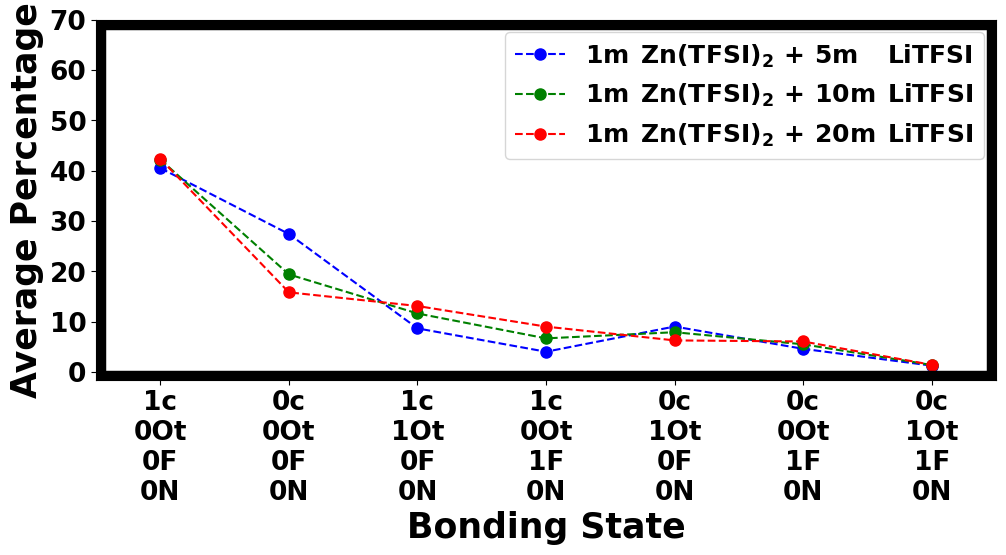

In [164]:

data2 = np.loadtxt("../../Mixed5mResults/Plots/DataFiles/OneHBabsValues.txt")
data2 = np.mean(data2,axis=0)
data3 = np.loadtxt("../../Mixed10mResults/Plots/DataFiles/OneHBabsValues.txt")
data3 = np.mean(data3,axis=0)
data4 = np.loadtxt("../../Mixed20mResults/Plots/DataFiles/OneHBabsValues.txt")
data4 = np.mean(data4,axis=0)


names= []

# N=0,1
for i in range(0,2):
    # Otfsi=0,1,2
    for j in range(0,3):
        # Zn=0,1
        for k in range(0,2):
            # F=0,1,2
            for l in range(0,3):
                names.append(f'{k}c\n{j}Ot\n{l}F\n{i}N')
            
names = np.array(names)

fig = plt.figure(figsize=(10,4),dpi = 100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

mx = 7

p = np.flip(data4.argsort())

data2 =data2[p][:mx]
data3 =data3[p][:mx]
data4 =data4[p][:mx]
names = names[p][:mx]

s = len(data2)+1


# plt.tight_layout()
# ax.xaxis.tick_top()

plt.yticks(weight = 'bold', size=19)
plt.xticks(np.arange(1,s), 
           names, 
           rotation = 0,
           weight = 'bold',
           size=19
          )

# plt.barh(np.arange(1,39),a39,edgecolor = 'black')

ax.plot(np.arange(1,s),data2, 'bo--', label = label2,  markersize=8)
ax.plot(np.arange(1,s),data3, 'go--', label = label3,  markersize=8)
ax.plot(np.arange(1,s),data4, 'ro--', label = label4,  markersize=8)

# ax.xaxis.set_label_position('top')
plt.ylabel("Average Percentage",weight = 'bold', size=25,color='k')
plt.xlabel("Bonding State",weight = 'bold', size=25,color='k')

plt.legend(fontsize=18)

plt.ylim(-1.5,70)
plt.xlim(0.5,7.5)

plt.axhline(y=-1.5,linewidth=14, color='k') 
plt.axvline(x=0.5,linewidth=14, color='k')  

plt.axhline(y=70,linewidth=14, color='k') 
plt.axvline(x=7.5,linewidth=14, color='k') 

plt.savefig('Mix_OneHBabsPercent.svg', bbox_inches='tight', format='svg')
# plt.savefig('OneHBabsPercent/OneHBabsPercent.eps', bbox_inches='tight', format='eps')

# plt.clf()

In [168]:
p

array([ 3,  0,  9,  4,  6,  1,  7, 21, 18,  2, 10, 15, 12,  5, 24, 19, 27,
        8, 22, 13, 16, 11, 25, 20, 30, 33, 28, 23, 14, 35, 34, 26, 29, 31,
       32, 17], dtype=int64)